In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
import tensorflow.keras as keras

In [4]:
import matplotlib.pyplot as plt
import cv2
import os 
from tensorflow.keras.preprocessing import *

In [5]:
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing import RMSprop

In [6]:
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import RMSprop

In [7]:
from tensorflow.keras.optimizers import RMSprop


In [8]:
import numpy as np

In [11]:
img = image.load_img("Train/Sakarapongal/10.jpeg")

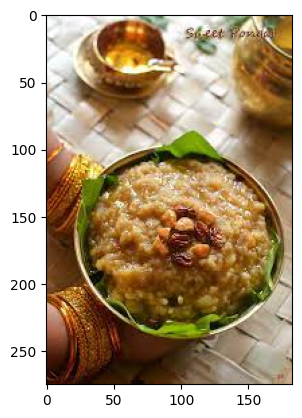

In [12]:
plt.imshow(img)

In [10]:
cv2.imread('Train/Sakarapongal/10.jpeg').shape

(275, 183, 3)

In [9]:
Train = ImageDataGenerator(rescale=1/255)
Validation = ImageDataGenerator(rescale=1/255)

In [10]:
train_data = Train.flow_from_directory('Train/',
                                        target_size=(200,200),
                                       batch_size=10,
                                       class_mode='binary')

validation_data = Validation.flow_from_directory('Validation/',
                                        target_size=(200,200),
                                       batch_size=10,
                                       class_mode='binary')

Found 32 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


train_x = pd.DataFrame(train_data)
vali_x = pd.DataFrame(validation_data)

In [11]:
train_data.class_indices

{'Sakarapongal': 0, 'Vadacurry': 1}

In [12]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
print(type(train_data))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                     
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    
                                    tf.keras.layers.Dense(1,activation='sigmoid'),                                    
                                    
])

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
              metrics=['accuracy']
             )

In [16]:
model_fit = model.fit(train_data,
                     steps_per_epoch=3,
                     epochs=100,
                     validation_data=validation_data)

Epoch 1/100
3/3 [==============================] - 4s 1s/step - loss: 1.1850 - accuracy: 0.5909 - val_loss: 0.6617 - val_accuracy: 0.5312
Epoch 2/100
3/3 [==============================] - 1s 498ms/step - loss: 0.6862 - accuracy: 0.6364 - val_loss: 0.6169 - val_accuracy: 0.5938
Epoch 3/100
3/3 [==============================] - 1s 470ms/step - loss: 0.6935 - accuracy: 0.6667 - val_loss: 0.6628 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 1s 495ms/step - loss: 0.6176 - accuracy: 0.5909 - val_loss: 0.5936 - val_accuracy: 0.5312
Epoch 5/100
3/3 [==============================] - 1s 493ms/step - loss: 0.5451 - accuracy: 0.7333 - val_loss: 2.1337 - val_accuracy: 0.5312
Epoch 6/100
3/3 [==============================] - 1s 464ms/step - loss: 1.6877 - accuracy: 0.7273 - val_loss: 0.5462 - val_accuracy: 0.9375
Epoch 7/100
3/3 [==============================] - 1s 487ms/step - loss: 0.5637 - accuracy: 0.6818 - val_loss: 0.9356 - val_accuracy: 0.5312
Epoch 8/100
3/3 

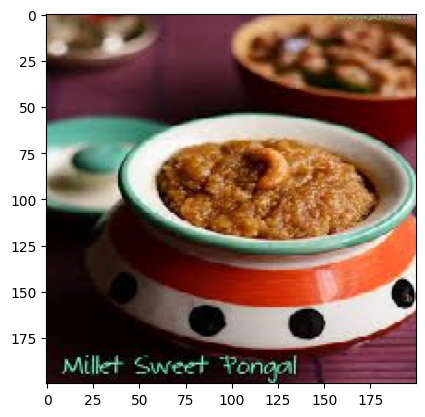

1/1 [==============================] - 0s 41ms/step
Its SAKARA_PONGAL


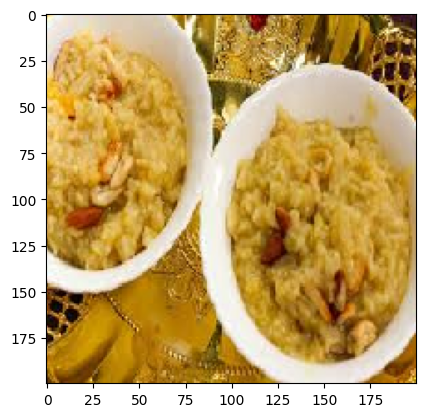

1/1 [==============================] - 0s 53ms/step
Its SAKARA_PONGAL


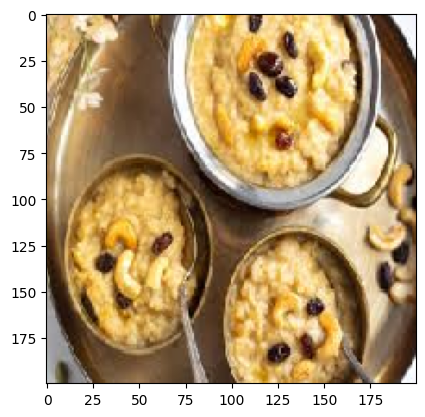

1/1 [==============================] - 0s 83ms/step
Its SAKARA_PONGAL


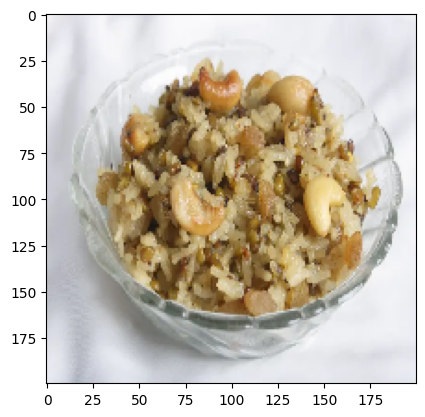

1/1 [==============================] - 0s 33ms/step
Its SAKARA_PONGAL


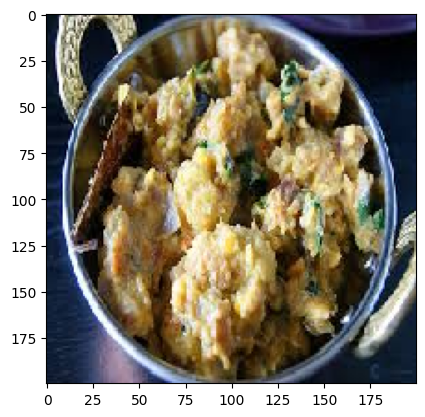

1/1 [==============================] - 0s 36ms/step
Its SAKARA_PONGAL


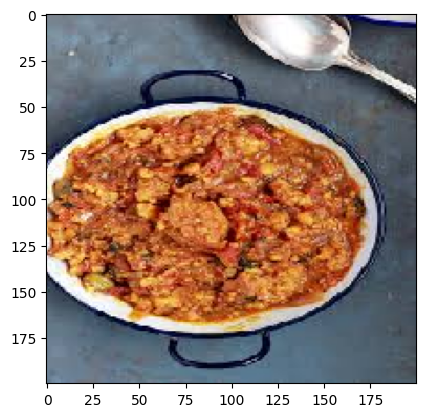

1/1 [==============================] - 0s 40ms/step
Its VADA_CURRY


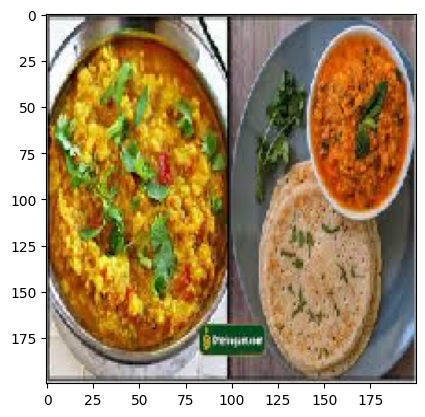

1/1 [==============================] - 0s 39ms/step
Its SAKARA_PONGAL


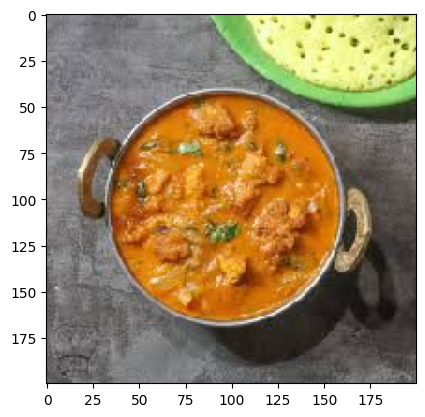

1/1 [==============================] - 0s 40ms/step
Its VADA_CURRY


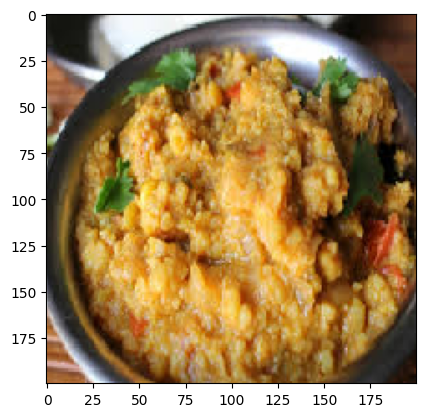

1/1 [==============================] - 0s 45ms/step
Its SAKARA_PONGAL


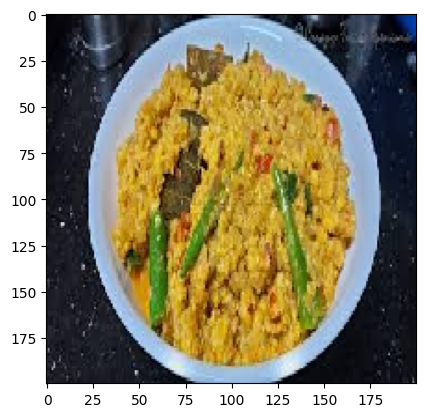

1/1 [==============================] - 0s 49ms/step
Its SAKARA_PONGAL


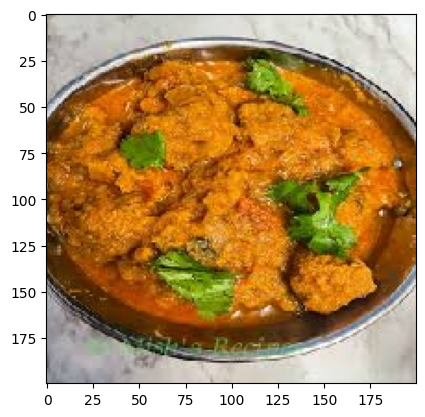

1/1 [==============================] - 0s 38ms/step
Its VADA_CURRY


In [18]:
dir_path = 'Test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    
    vl = model.predict(images)
    
    if vl ==0:
        print('Its SAKARA_PONGAL')
    else:
        print('Its VADA_CURRY')

In [19]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [ ]:
model.save('sa_va.h5')